## Bivariate Stats: Categorical to Categorical

A categorical-to-categorical context uses visualization before analysis. How do you visualize two categorical variables when there is no ordering to the values, as there is with numeric variables? We cannot calculate means, std, skew, kurt, or any of the measures we have used so far. The primary measure of categorical values is their count across values. We will learn to visualize this in two ways:
- Count-based charts
- CrossTab (or Contingency Table) with heatmap

### Count-based Categorical Charts in Seaborn

Because we can count categorical groups, we can make some use of bar charts.

In [1]:
import pandas as pd

df = pd.read_csv('data/lc_small.csv')
df.head()

,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,...,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Fully Paid,6,5500,2017-11-01,36 months,7.35,170.71,5869.266021,5500.00,369.27,...,0.0,7492,22.6,0.0,7492.0,9.0,33200.0,2.31,A,A4
1,Current,5,20000,2017-02-01,60 months,14.99,475.70,11375.160000,6275.78,5099.38,...,0.0,21482,64.5,0.0,29091.0,19.0,33300.0,16.03,C,C4
2,Current,5,25000,2018-11-01,36 months,7.02,772.16,2306.730000,1888.74,417.99,...,0.0,36104,39.3,0.0,567211.0,32.0,91900.0,17.63,A,A2
3,Current,5,16800,2018-07-01,36 months,15.02,582.55,4000.750000,2704.99,1295.76,...,0.0,29854,100.2,0.0,780426.0,8.0,29800.0,19.51,C,C3
4,Current,5,31300,2018-09-01,60 months,27.27,960.82,4709.260000,1305.65,3403.61,...,0.0,11301,45.9,0.0,494372.0,50.0,24600.0,50.55,E,E5


In [2]:
pd.DataFrame({'Count':df.count(), 
            '% Missing':round(df.isnull().sum()/len(df)*100, 2),
            'Unique':df.nunique(),
            'Type':df.dtypes})

,Count,% Missing,Unique,Type
loan_status,10476,0.00,6,object
loan_status_numeric,10476,0.00,6,int64
loan_amnt,10476,0.00,775,int64
issue_d,10476,0.00,35,object
term,10476,0.00,2,object
int_rate,10476,0.00,206,float64
installment,10476,0.00,5961,float64
total_pymnt,10476,0.00,10203,float64
total_rec_prncp,10476,0.00,7565,float64
total_rec_int,10476,0.00,10109,float64


The primary label in this dataset is loan_status. If we can explain what causes a loan to be Fully Paid versus Charged Off, then we can help loan officers make better decisions about what terms to offer borrowers to get more grade A loans. Almost every borrower profile has an interest rate at which the loan could be profitable. We simply need to help that decision maker know who is more or less likely to pay off a loan based on the borrower’s credit report and personal information.

C:\Users\skous2\AppData\Local\Temp\ipykernel_10792\4258716728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz = sns.catplot(x="loan_status", kind="count", palette="ch:.25", data=df,


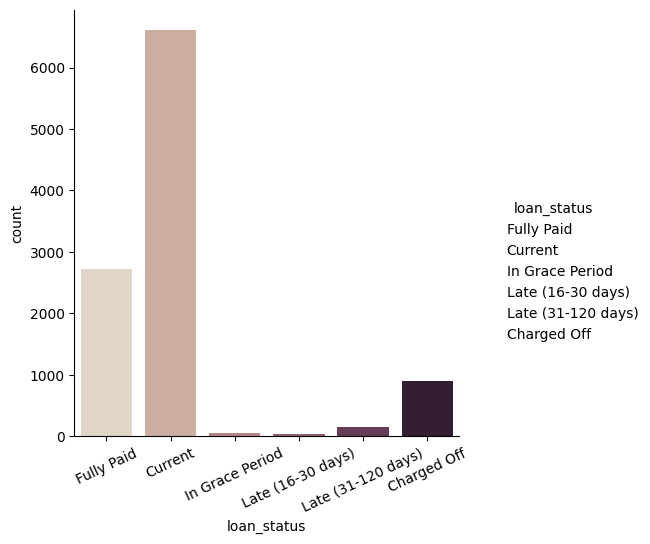

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
viz = sns.catplot(x="loan_status", kind="count", palette="ch:.25", data=df,
                order=['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off']);
viz.set_xticklabels(rotation=25);

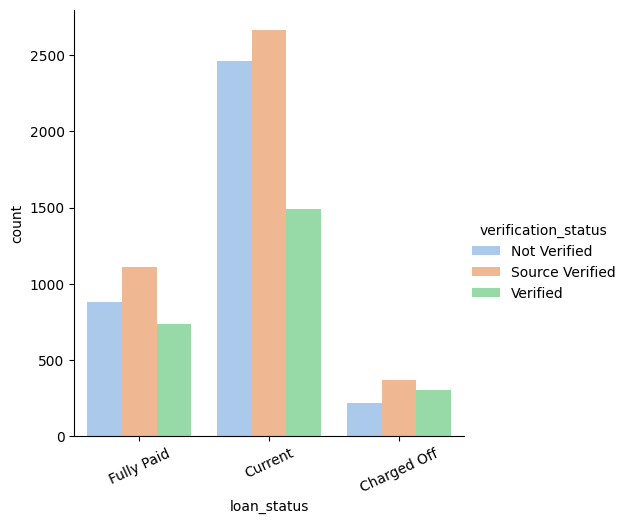

In [5]:
viz = sns.catplot(x="loan_status", hue="verification_status",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off']);
viz.set_xticklabels(rotation=25);

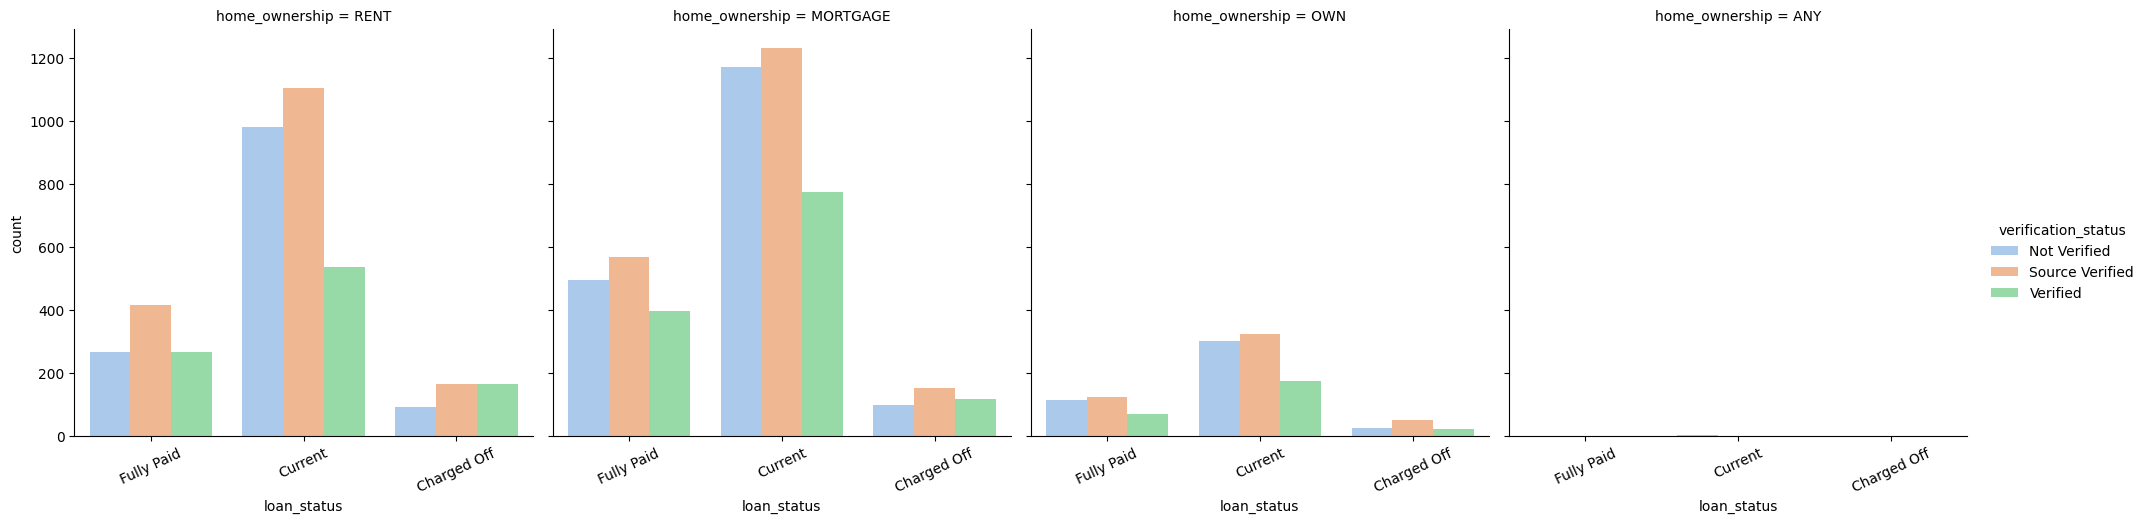

In [6]:
viz = sns.catplot(x="loan_status", hue="verification_status", col="home_ownership",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off']);
viz.set_xticklabels(rotation=25);

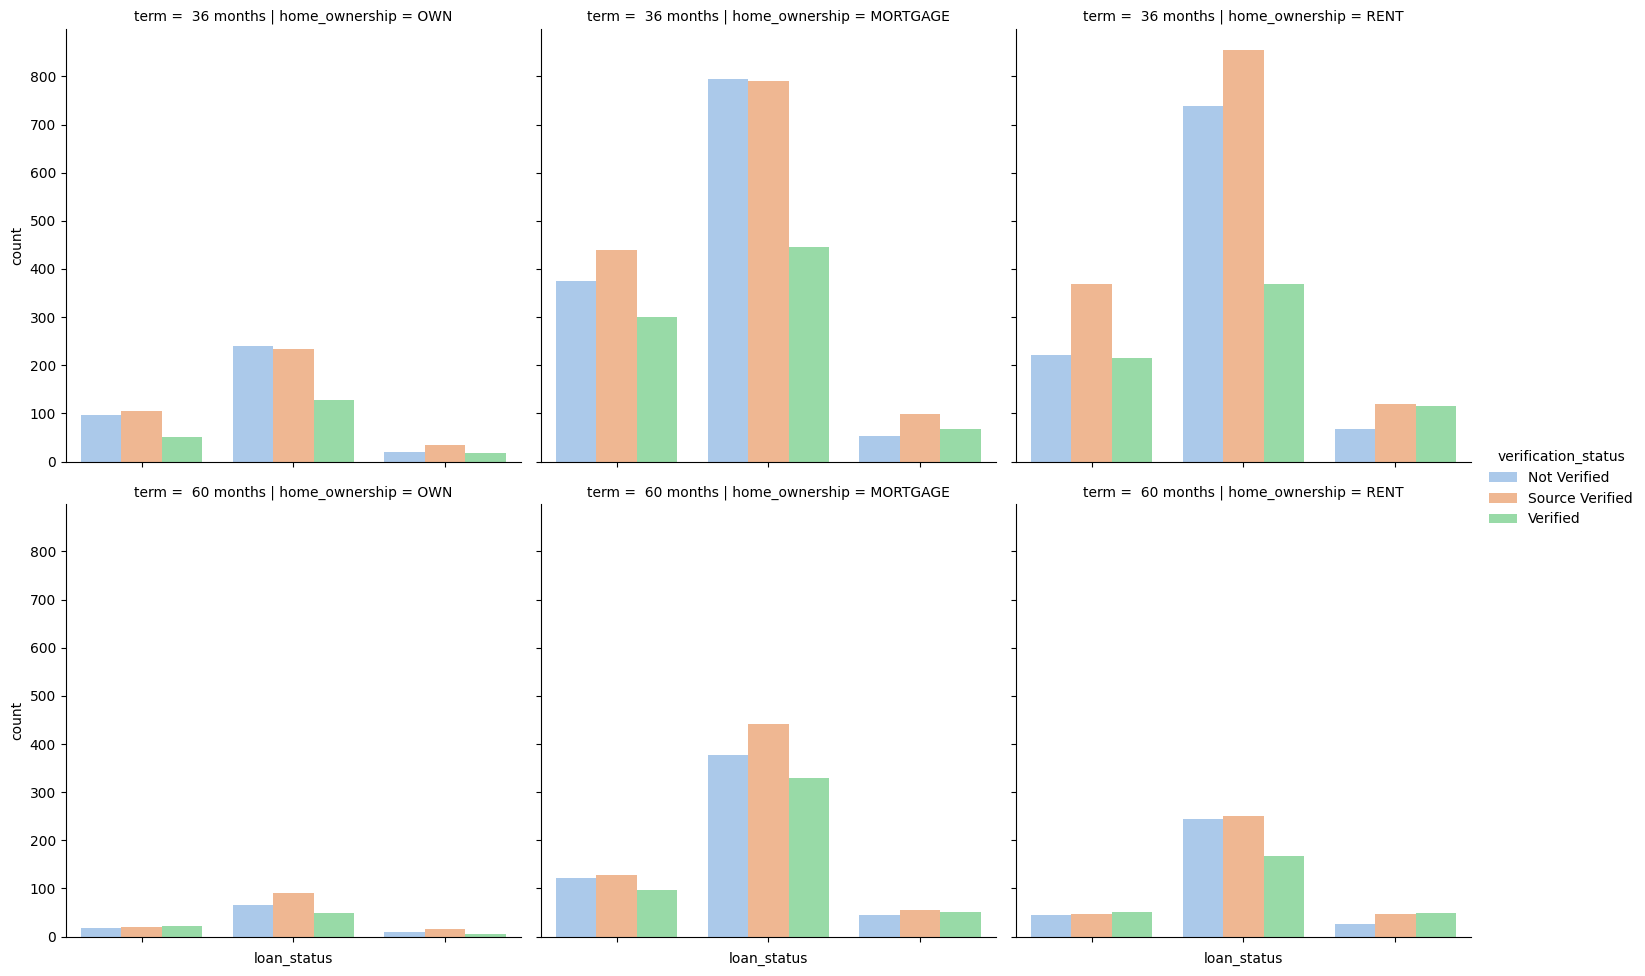

In [7]:
viz = sns.catplot(x="loan_status", hue="verification_status", 
                col="home_ownership", row="term",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off'],
                col_order=['OWN', 'MORTGAGE', 'RENT'],);
viz.set_xticklabels(rotation=25);

### Crosstab and Heatmap

CrossTab is a very powerful descriptive data analysis object in the Pandas package that is much like a PivotTable in Microsoft Excel. We will use it to summarize a table of categorical group counts.

In [8]:
pd.crosstab(df['loan_status'], df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,220,372,306
Current,2462,2663,1487
Fully Paid,878,1108,736
In Grace Period,11,28,17
Late (16-30 days),12,10,14
Late (31-120 days),41,55,56


We can enhance a CrossTab using the Seaborn heatmap() object that assigns a color from a gradient scale to each cell based on the count value:

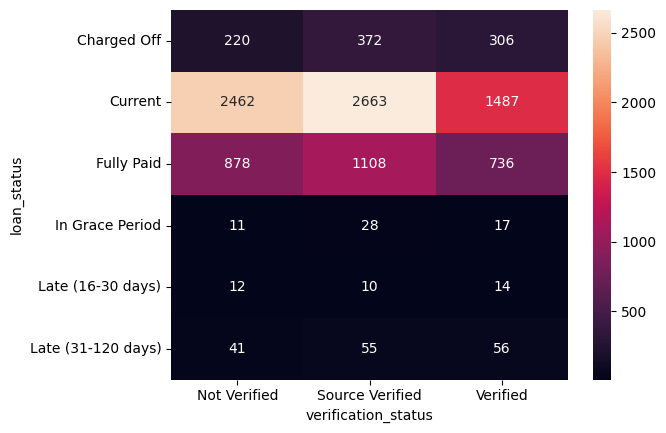

In [9]:
sns.heatmap(pd.crosstab(df.loan_status, df.verification_status), annot=True, fmt='d');